In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("gurgaon_properties_missing_value_imputed.csv")

In [3]:
df.head()

,sector,property_type,price,area,bedRoom,bathroom,balcony,floorNum,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,2.45,2061.08,3.0,3.0,3,0.0,Relatively New,1865.0,0,0,0,0,1,0,49,687.026667
1,sector 109,house,6.10,2430.00,5.0,6.0,3+,2.0,Moderately Old,2430.0,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,1.65,2800.41,4.0,3.0,3,8.0,New Property,3111.0,0,0,1,0,0,0,20,700.102500
3,sector 7,house,0.66,550.00,3.0,1.0,1.0,3.0,Relatively New,550.0,1,0,0,0,0,0,22,183.333333
4,sector 37d,flat,1.40,1811.13,3.0,3.0,3,5.0,Relatively New,1711.0,0,0,0,0,0,2,149,603.710000


In [4]:
df.shape

(3566, 18)

In [5]:
train_df = df.drop(columns=['area_to_bedroom', 'area'])

In [6]:
train_df.head()

,sector,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
0,sector 49,flat,2.45,3.0,3.0,3,0.0,Relatively New,1865.0,0,0,0,0,1,0,49
1,sector 109,house,6.10,5.0,6.0,3+,2.0,Moderately Old,2430.0,0,0,1,0,0,0,30
2,sector 1,flat,1.65,4.0,3.0,3,8.0,New Property,3111.0,0,0,1,0,0,0,20
3,sector 7,house,0.66,3.0,1.0,1.0,3.0,Relatively New,550.0,1,0,0,0,0,0,22
4,sector 37d,flat,1.40,3.0,3.0,3,5.0,Relatively New,1711.0,0,0,0,0,0,2,149


# Luxury Score

<Axes: xlabel='luxury_score'>

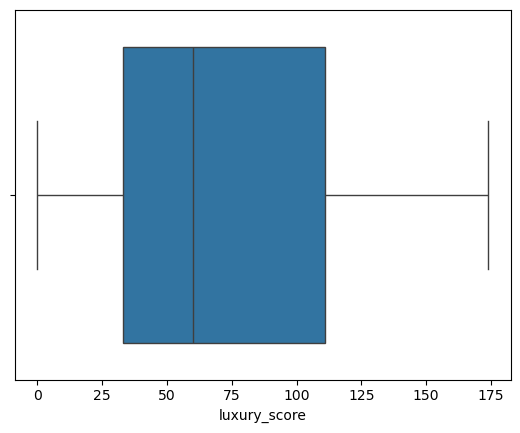

In [8]:
sns.boxplot(x=df['luxury_score'])

In [9]:
def categorize_luxury_score(score):
    if 0 <= score < 50:
        return 'Low'
    if 50 <= score < 150:
        return 'Medium'
    if 150 <= score <= 175:
        return 'High'
    else:
        return None

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury_score)
train_df.drop(columns = ['luxury_score'], inplace=True)
train_df.head()

,sector,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_category
0,sector 49,flat,2.45,3.0,3.0,3,0.0,Relatively New,1865.0,0,0,0,0,1,0,Low
1,sector 109,house,6.10,5.0,6.0,3+,2.0,Moderately Old,2430.0,0,0,1,0,0,0,Low
2,sector 1,flat,1.65,4.0,3.0,3,8.0,New Property,3111.0,0,0,1,0,0,0,Low
3,sector 7,house,0.66,3.0,1.0,1.0,3.0,Relatively New,550.0,1,0,0,0,0,0,Low
4,sector 37d,flat,1.40,3.0,3.0,3,5.0,Relatively New,1711.0,0,0,0,0,0,2,Medium


# FloorNum

<Axes: xlabel='floorNum'>

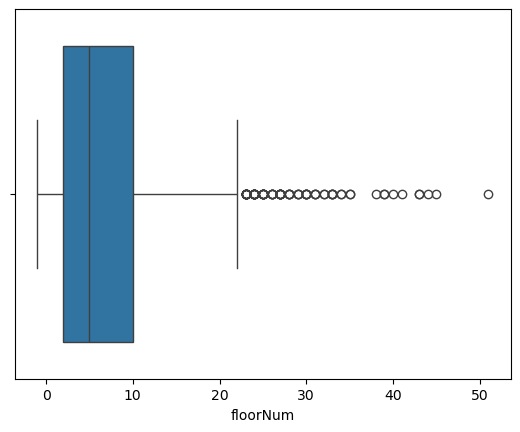

In [12]:
sns.boxplot(x=train_df['floorNum'])

In [13]:
train_df['floorNum'].describe()

count    3566.000000
mean        6.894279
std         6.085855
min        -1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

In [14]:
def categorize_floorNum(floorNum):
    if 0 <= floorNum < 2:
        return 'Low Floor'
    if 2 <= floorNum <= 10:
        return 'Mid Floor'
    if 11 <= floorNum <= 51:
        return 'High Floor'
    else:
        return None

In [15]:
train_df['floorNum_category'] = train_df['floorNum'].apply(categorize_floorNum)
train_df.drop(columns=['floorNum'], inplace=True)
train_df.head()

,sector,property_type,price,bedRoom,bathroom,balcony,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_category,floorNum_category
0,sector 49,flat,2.45,3.0,3.0,3,Relatively New,1865.0,0,0,0,0,1,0,Low,Low Floor
1,sector 109,house,6.10,5.0,6.0,3+,Moderately Old,2430.0,0,0,1,0,0,0,Low,Mid Floor
2,sector 1,flat,1.65,4.0,3.0,3,New Property,3111.0,0,0,1,0,0,0,Low,Mid Floor
3,sector 7,house,0.66,3.0,1.0,1.0,Relatively New,550.0,1,0,0,0,0,0,Low,Mid Floor
4,sector 37d,flat,1.40,3.0,3.0,3,Relatively New,1711.0,0,0,0,0,0,2,Medium,Mid Floor


In [16]:
train_df['floorNum_category'].value_counts()

floorNum_category
Mid Floor     2306
High Floor     807
Low Floor      450
Name: count, dtype: int64

In [31]:
train_df[train_df['floorNum_category'].isnull()]

,sector,property_type,price,bedRoom,bathroom,balcony,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_category,floorNum_category
268,sector 63a,flat,0.42,3.0,2.0,2,Under Construction,630.0,0,0,0,0,0,0,Low,None
1671,sector 67a,flat,1.30,2.0,2.0,2,New Property,1296.0,0,0,0,0,0,0,Medium,None
2518,sector 4,flat,0.39,2.0,2.0,1,Relatively New,950.0,0,0,0,0,0,0,Low,None


In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

In [20]:
categorical_cols

Index(['sector', 'property_type', 'balcony', 'agePossession',
       'luxury_category', 'floorNum_category'],
      dtype='object')

In [21]:
categorical_cols

Index(['sector', 'property_type', 'balcony', 'agePossession',
       'luxury_category', 'floorNum_category'],
      dtype='object')

In [22]:
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']



[array(['a block', 'b block', 'c block', 'dlf phase', 'dwarka expressway',
       'golf course', 'gwal pahari', 'manesar', 'mehrauli gurgaon',
       'new gurgaon', 'new palam', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 1a', 'sector 2', 'sector 21',
       'sector 22', 'sector 23', 'sector 26', 'sector 27', 'sector 28',
       'sector 3', 'sector 30', 'sector 31', 'sector 33', 'sector 36',
       'sector 36a', 'sector 37c', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56

In [23]:
X_label.head()

,sector,property_type,bedRoom,bathroom,balcony,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_category,floorNum_category
0,58.0,0.0,3.0,3.0,5.0,3.0,1865.0,0,0,0,0,1,0,1.0,1.0
1,19.0,1.0,5.0,6.0,6.0,0.0,2430.0,0,0,1,0,0,0,1.0,2.0
2,11.0,0.0,4.0,3.0,5.0,1.0,3111.0,0,0,1,0,0,0,1.0,2.0
3,82.0,1.0,3.0,1.0,2.0,3.0,550.0,1,0,0,0,0,0,1.0,2.0
4,48.0,0.0,3.0,3.0,5.0,3.0,1711.0,0,0,0,0,0,2,2.0,2.0


In [24]:
y_label.head()

0    2.45
1    6.10
2    1.65
3    0.66
4    1.40
Name: price, dtype: float64

# Technique 1 - Correlation Analysis

<Axes: >

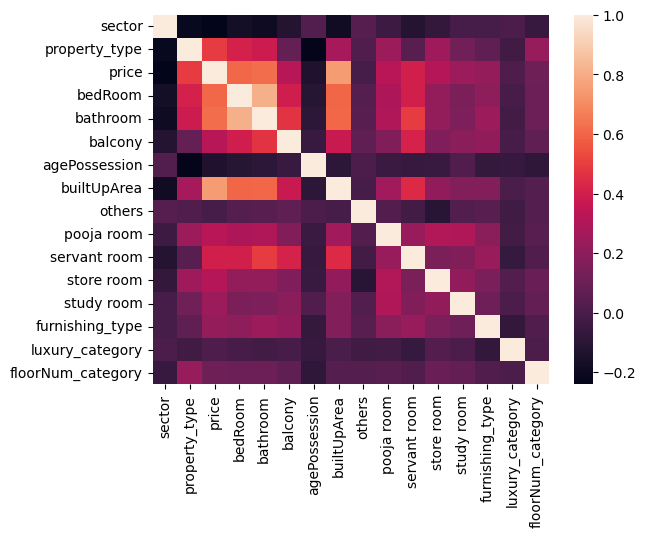

In [26]:
sns.heatmap(data_label_encoded.corr())

In [27]:
fi_df1 = data_label_encoded.corr()['price'].sort_values(ascending=False).iloc[1:, ].to_frame().reset_index().rename(columns={'index':'feature', 'price':'corr_coef'})

# Technique 2 - Random Forest Feature Importance

In [29]:
from sklearn.ensemble import RandomForestRegressor


rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

fi_df2 = pd.DataFrame(
    {
        'feature':X_label.columns,
        'rf_importance': rf_label.feature_importances_
    }
).sort_values(by='rf_importance', ascending=False)

In [30]:
fi_df2

,feature,rf_importance
6,builtUpArea,0.652959
0,sector,0.112144
1,property_type,0.098653
2,bedRoom,0.028087
3,bathroom,0.023614
9,servant room,0.017399
5,agePossession,0.013908
4,balcony,0.011408
13,luxury_category,0.010196
11,study room,0.007643


# Technique 3 - Gradient Boosting Feature Importance

In [32]:
from sklearn.ensemble import GradientBoostingRegressor


gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

fi_df3 = pd.DataFrame(
    {
        'feature':X_label.columns,
        'rf_importance': gb_label.feature_importances_
    }
).sort_values(by='rf_importance', ascending=False)

In [33]:
fi_df3

,feature,rf_importance
6,builtUpArea,0.687319
0,sector,0.104024
1,property_type,0.099122
2,bedRoom,0.033925
3,bathroom,0.030426
9,servant room,0.024904
11,study room,0.005232
5,agePossession,0.004804
4,balcony,0.002656
13,luxury_category,0.002244


# Technique 4 - Permutation Importance

In [35]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size = 0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

fi_df4 = pd.DataFrame(
    {
        'feature':X_label.columns,
        'permutation_importance': perm_importance.importances_mean
    }
).sort_values(by='permutation_importance', ascending=False)



In [36]:
fi_df4

,feature,permutation_importance
6,builtUpArea,0.742256
1,property_type,0.152716
0,sector,0.080196
2,bedRoom,0.017595
3,bathroom,0.016750
9,servant room,0.012768
13,luxury_category,0.003822
11,study room,0.003798
14,floorNum_category,0.002973
8,pooja room,0.001598


# Technique 5 - LASSO

In [38]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

fi_df5 = pd.DataFrame(
    {
        'feature':X_label.columns,
        'lasso_coeff': lasso.coef_
    }
).sort_values(by='lasso_coeff', ascending=False)



In [39]:
fi_df5

,feature,lasso_coeff
6,builtUpArea,1.478525
1,property_type,0.685149
3,bathroom,0.253504
10,store room,0.193299
11,study room,0.186930
9,servant room,0.145992
12,furnishing_type,0.139291
2,bedRoom,0.121398
8,pooja room,0.076860
13,luxury_category,0.060187


# Technique 6 - Reccursive Feature Elimation

In [41]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

selected_features = X_label.columns[selector_label.support_]

selected_coefficients = selector_label.estimator_.feature_importances_

fi_df6 = pd.DataFrame(
    {
        'feature': selected_features,
        'rfe_score': selected_coefficients
    }
).sort_values(by='rfe_score', ascending=False)


In [42]:
fi_df6

,feature,rfe_score
6,builtUpArea,0.653843
0,sector,0.109242
1,property_type,0.099815
3,bathroom,0.026225
2,bedRoom,0.025597
9,servant room,0.017119
5,agePossession,0.013853
4,balcony,0.011367
13,luxury_category,0.009099
8,pooja room,0.007234


# Technique 7 - Linear Regression Weights

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

In [45]:
fi_df7

,feature,reg_coeffs
6,builtUpArea,1.481464
1,property_type,0.686054
3,bathroom,0.259428
10,store room,0.196780
11,study room,0.195577
9,servant room,0.155231
12,furnishing_type,0.148303
2,bedRoom,0.123471
8,pooja room,0.079706
13,luxury_category,0.070731


# Technique 8 - SHAP

In [47]:
import shap

In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_label)

shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 3.11817264e-01, -2.23842089e-01, -1.68560068e-02, ...,
        -3.85791687e-02, -3.73634858e-03, -2.40123022e-02],
       [-2.24218266e-01,  2.00278174e+00,  1.14976200e-01, ...,
        -1.93654506e-02, -5.41071661e-02,  2.23062696e-03],
       [-8.45035830e-01, -1.18161489e+00, -3.56849188e-02, ...,
        -6.07454666e-02, -3.29178744e-02, -1.54059582e-02],
       ...,
       [-8.99313350e-02, -2.18811726e-01, -2.78644473e-03, ...,
        -1.08990633e-02, -4.42491079e-03, -1.37699057e-02],
       [-2.85038072e-01, -2.97051461e-01, -1.15922928e-01, ...,
         9.38796225e-03,  1.46930856e-05, -3.44468779e-02],
       [-3.90377166e-01, -2.46275639e-01, -1.12896421e-02, ...,
        -1.36578232e-02, -8.05805639e-03, -7.66936660e-03]])

In [49]:
X_label.shape

(3566, 15)

In [50]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0),
}).sort_values(by= 'SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,builtUpArea,1.245292
1,property_type,0.473517
0,sector,0.346637
9,servant room,0.095653
3,bathroom,0.091131
2,bedRoom,0.063530
4,balcony,0.035579
5,agePossession,0.029610
12,furnishing_type,0.027578
13,luxury_category,0.022478


In [51]:
imp_values_df = fi_df1.merge(fi_df2, on='feature').merge(fi_df3, on='feature').merge(fi_df4, on='feature').merge(fi_df5, on='feature').merge(fi_df6, on='feature').merge(fi_df7, on='feature').merge(fi_df8, on='feature')

In [52]:
features = imp_values_df['feature']

In [53]:
imp_df = imp_values_df.iloc[:, 1:].divide(imp_values_df.iloc[:, 1:].sum(axis=0), axis=1)

In [54]:
imp_df.insert(0, value=features, column='feature')

In [55]:
imp_df

,feature,corr_coef,rf_importance_x,rf_importance_y,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
0,builtUpArea,0.186458,0.652959,0.687319,0.717098,0.471811,0.653843,0.471496,0.499176
1,bathroom,0.153510,0.023614,0.030426,0.016182,0.080895,0.026225,0.082566,0.036530
2,bedRoom,0.150904,0.028087,0.033925,0.016999,0.038739,0.025597,0.039296,0.025466
3,property_type,0.122618,0.098653,0.099122,0.147540,0.218637,0.099815,0.218346,0.189810
4,servant room,0.099617,0.017399,0.024904,0.012335,0.046587,0.017119,0.049404,0.038343
5,pooja room,0.080921,0.005748,0.000875,0.001544,0.024527,0.007234,0.025368,0.003585
6,balcony,0.079751,0.011408,0.002656,-0.000893,-0.017547,0.011367,-0.025155,0.014262
7,store room,0.078633,0.003153,0.001252,-0.000121,0.061684,0.004006,0.062628,0.003742
8,study room,0.060502,0.007643,0.005232,0.003669,0.059651,0.007035,0.062245,0.006838
9,furnishing_type,0.054960,0.007586,0.001544,0.000791,0.044449,0.006886,0.047199,0.011055


In [56]:
final_imp_df = imp_df.iloc[:, 1:].mean(axis=1).to_frame().reset_index().rename(columns={0: 'imp_score'})

In [57]:
final_imp_df

,index,imp_score
0,0,0.542520
1,1,0.056244
2,2,0.044877
3,3,0.149318
4,4,0.038214
5,5,0.018725
6,6,0.009481
7,7,0.026872
8,8,0.026602
9,9,0.021809


In [58]:
imp_df = imp_df.reset_index()

In [59]:
imp_df.merge(final_imp_df, on='index')[['feature', 'imp_score']].sort_values(by='imp_score', ascending=False)

,feature,imp_score
0,builtUpArea,0.542520
3,property_type,0.149318
1,bathroom,0.056244
14,sector,0.049174
2,bedRoom,0.044877
4,servant room,0.038214
7,store room,0.026872
8,study room,0.026602
9,furnishing_type,0.021809
5,pooja room,0.018725


In [60]:
X_label

,sector,property_type,bedRoom,bathroom,balcony,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_category,floorNum_category
0,58.0,0.0,3.0,3.0,5.0,3.0,1865.0,0,0,0,0,1,0,1.0,1.0
1,19.0,1.0,5.0,6.0,6.0,0.0,2430.0,0,0,1,0,0,0,1.0,2.0
2,11.0,0.0,4.0,3.0,5.0,1.0,3111.0,0,0,1,0,0,0,1.0,2.0
3,82.0,1.0,3.0,1.0,2.0,3.0,550.0,1,0,0,0,0,0,1.0,2.0
4,48.0,0.0,3.0,3.0,5.0,3.0,1711.0,0,0,0,0,0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,115.0,0.0,2.0,1.0,0.0,3.0,476.0,0,0,0,0,0,0,1.0,1.0
3562,118.0,1.0,2.0,2.0,2.0,1.0,700.0,0,0,0,0,0,0,1.0,2.0
3563,92.0,0.0,3.0,3.0,5.0,1.0,1650.0,0,0,1,0,0,0,2.0,2.0
3564,13.0,0.0,2.0,3.0,5.0,3.0,1613.0,0,0,1,0,0,2,2.0,2.0


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [62]:
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)

score = cross_val_score(rf_label, X_label, y_label, cv=5, scoring='r2')

In [63]:
score.mean()

0.8171831063505393

In [64]:
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)

score = cross_val_score(rf_label, X_label.drop(columns=['others', 
                                                        'agePossession', 
                                                        'floorNum_category', 
                                                        'balcony',  
                                                       'pooja room', 
                                                       'furnishing_type', 
                                                        'store room', 
                                                       
                                                       
                                                       ]), y_label, cv=5, scoring='r2')

score.mean()

0.8264951234476288

In [33]:
train_df.drop(columns=['others',  
                       'agePossession', 
                       'floorNum_category', 
                       'balcony',  
                       'pooja room', 
                       'furnishing_type', 
                       'store room'], inplace=True)

In [35]:
train_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [37]:
train_df

,sector,property_type,price,bedRoom,bathroom,builtUpArea,servant room,study room,luxury_category
0,sector 49,flat,2.45,3.0,3.0,1865.0,0,1,Low
1,sector 109,house,6.10,5.0,6.0,2430.0,1,0,Low
2,sector 1,flat,1.65,4.0,3.0,3111.0,1,0,Low
3,sector 7,house,0.66,3.0,1.0,550.0,0,0,Low
4,sector 37d,flat,1.40,3.0,3.0,1711.0,0,0,Medium
...,...,...,...,...,...,...,...,...,...
3561,sohna road,flat,0.32,2.0,1.0,476.0,0,0,Low
3562,surat nagar,house,0.71,2.0,2.0,700.0,0,0,Low
3563,sector 79,flat,1.85,3.0,3.0,1650.0,1,0,Medium
3564,sector 103,flat,0.93,2.0,3.0,1613.0,1,0,Medium
